In [1]:
import numpy as np 
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling3D, Flatten, Dropout
import seaborn as sns
sns.set_theme(style="dark")
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
for i in [x_train,x_val,x_test]:
    i = i/255

In [8]:
batch_size = 64

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(batch_size)

In [10]:
batch = train_ds.as_numpy_iterator().next()

In [11]:
print([batch[0].max(),batch[0].min(),batch[0].mean()])

[255, 0, 32.96713568239796]


In [12]:
batch[0].shape

(64, 28, 28, 1)

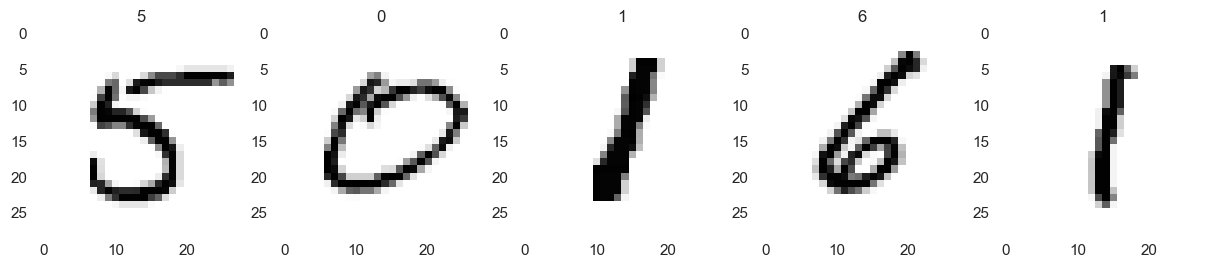

In [13]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int),cmap = 'Grays')
    ax[idx].title.set_text(batch[1][idx])

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), 1,  activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         36992     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
y_train = tf.one_hot(y_train,10)
y_val = tf.one_hot(y_val,10)
y_test = tf.one_hot(y_test,10)

In [18]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_val,y_val),batch_size=batch_size)

Epoch 1/10


750/750 [==============================] - 31s 39ms/step - loss: 0.7537 - accuracy: 0.7967 - val_loss: 0.1545 - val_accuracy: 0.9534
Epoch 2/10
750/750 [==============================] - 31s 41ms/step - loss: 0.2218 - accuracy: 0.9355 - val_loss: 0.1104 - val_accuracy: 0.9686
Epoch 3/10
750/750 [==============================] - 28s 37ms/step - loss: 0.1713 - accuracy: 0.9504 - val_loss: 0.1013 - val_accuracy: 0.9703
Epoch 4/10
750/750 [==============================] - 28s 37ms/step - loss: 0.1406 - accuracy: 0.9577 - val_loss: 0.0844 - val_accuracy: 0.9756
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.1251 - accuracy: 0.9629 - val_loss: 0.0937 - val_accuracy: 0.9735
Epoch 6/10
750/750 [==============================] - 28s 37ms/step - loss: 0.1129 - accuracy: 0.9673 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 7/10
750/750 [==============================] - 28s 37ms/step - loss: 0.1026 - accuracy: 0.9698 - val_loss: 0.0740 - val_accuracy: 0.9784
Epo

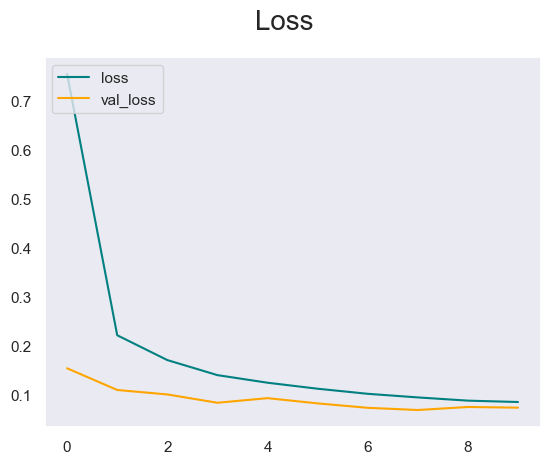

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

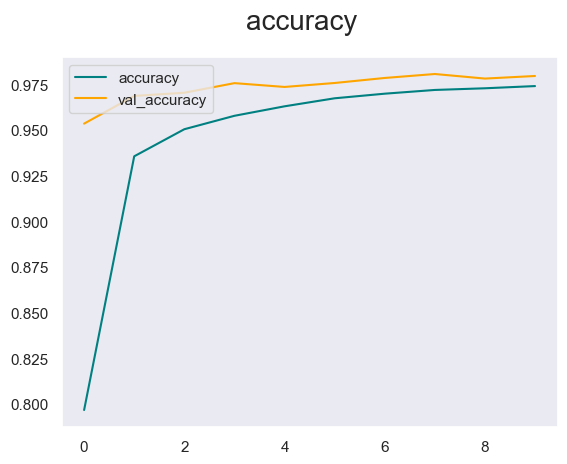

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
y_pred=np.argmax(model.predict(x_test),axis=1)
y_true = np.argmax(y_test, axis=1)
print("Accuracy:",accuracy_score(y_true, y_pred))

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9812


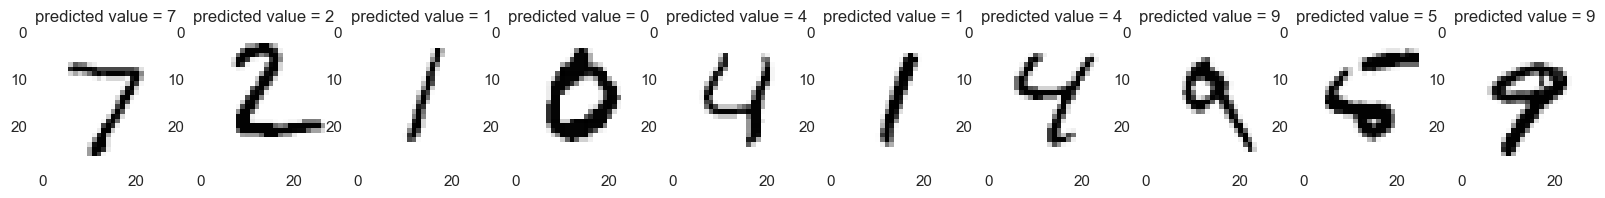

In [22]:
fig, ax = plt.subplots(ncols=10, figsize=(20,15))
for idx, img in enumerate(x_test[:10]):
    ax[idx].imshow(img,cmap = 'Grays')
    ax[idx].title.set_text(f'predicted value = {y_pred[idx]}')